In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [39]:
data =pd.read_excel('E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/ALL_Intersection.xlsx')
dataClass = pd.read_excel('E:/文档系列/python 系列/TheData/0_theDATA_end(1991-2017pop&GDP&vc)/CijClass(2000-2017).xlsx')

In [4]:
###得到每一个分类里的城市
def get_city(data,classname):
    clsM=sorted(data[classname].drop_duplicates().values)###得到的分类数作为新列写进去
    DATAM=[]###按照城市对数据进行分组
    city=[]###每一组里面的每一列的均值
    for liM in clsM:
        datM=data[data[classname].isin([liM])]
        city.append(datM['city'].values)###得到每一类的城市
    return(city)

In [5]:
city1 = get_city(dataClass,'clusterM') ###得到投资金额不同类的城市
city2 = get_city(dataClass,'clusterT') ###得到投资金额不同类的城市
city3 = get_city(dataClass,'clusterG') ###得到投资金额不同类的城市
city22 = get_city(dataClass,'clusterT3') ###得到投资次数分为三类不同类的城市

In [6]:
city1

[array(['北京', '天津', '沧州', '廊坊', '吕梁', '铁岭', '吉林', '白山', '黑河', '上海', '南京',
        '无锡', '常州', '苏州', '南通', '扬州', '镇江', '泰州', '杭州', '宁波', '嘉兴', '湖州',
        '绍兴', '金华', '合肥', '芜湖', '蚌埠', '马鞍山', '宣城', '福州', '厦门', '泉州', '漳州',
        '南平', '龙岩', '新余', '吉安', '宜春', '抚州', '上饶', '济南', '青岛', '烟台', '潍坊',
        '新乡', '许昌', '驻马店', '武汉', '荆门', '黄冈', '长沙', '益阳', '怀化', '广州', '深圳',
        '珠海', '佛山', '肇庆', '中山', '成都', '玉溪', '西安', '咸阳', '榆林', '白银', '定西',
        '西宁', '吴忠'], dtype=object),
 array(['秦皇岛', '邢台', '保定', '沈阳', '大连', '朝阳', '长春', '通化', '哈尔滨', '大庆', '徐州',
        '淮安', '盐城', '舟山', '安庆', '莆田', '淄博', '东营', '济宁', '威海', '临沂', '滨州',
        '开封', '洛阳', '濮阳', '商丘', '宜昌', '孝感', '株洲', '湘潭', '常德', '永州', '河源',
        '东莞', '柳州', '重庆', '绵阳', '昆明', '乌鲁木齐', '克拉玛依'], dtype=object),
 array(['承德', '呼和浩特', '绥化', '连云港', '宿迁', '衢州', '台州', '铜陵', '德州', '韶关',
        '惠州', '海口', '自贡', '乐山', '银川'], dtype=object),
 array(['石家庄', '唐山', '邯郸', '太原', '包头', '本溪', '营口', '葫芦岛', '温州', '南昌', '萍乡',
        '九江', '赣州', '日照

In [7]:
city22

[array(['石家庄', '唐山', '秦皇岛', '邯郸', '邢台', '保定', '承德', '太原', '呼和浩特', '包头',
        '沈阳', '大连', '本溪', '营口', '朝阳', '葫芦岛', '长春', '吉林', '哈尔滨', '大庆', '徐州',
        '淮安', '温州', '舟山', '安庆', '莆田', '南昌', '九江', '赣州', '东营', '济宁', '日照',
        '莱芜', '临沂', '滨州', '郑州', '开封', '洛阳', '平顶山', '安阳', '濮阳', '商丘', '衡阳',
        '永州', '韶关', '汕头', '江门', '东莞', '南宁', '柳州', '海口', '重庆', '自贡', '绵阳',
        '昆明', '咸阳', '汉中', '榆林', '兰州', '西宁', '银川', '乌鲁木齐'], dtype=object),
 array(['天津', '通化', '绥化', '连云港', '宿迁', '绍兴', '台州', '合肥', '芜湖', '蚌埠', '铜陵',
        '新余', '吉安', '宜春', '抚州', '青岛', '淄博', '烟台', '潍坊', '威海', '德州', '新乡',
        '焦作', '驻马店', '宜昌', '荆门', '荆州', '株洲', '湘潭', '常德', '益阳', '怀化', '肇庆',
        '惠州', '乐山'], dtype=object),
 array(['北京', '沧州', '廊坊', '吕梁', '铁岭', '白山', '黑河', '上海', '南京', '无锡', '常州',
        '苏州', '南通', '盐城', '扬州', '镇江', '泰州', '杭州', '宁波', '嘉兴', '湖州', '金华',
        '衢州', '马鞍山', '宣城', '福州', '厦门', '泉州', '漳州', '南平', '龙岩', '萍乡', '上饶',
        '济南', '许昌', '武汉', '孝感', '黄冈', '长沙', '广州', '深圳', '珠海', '佛山', '河源'

In [8]:
City1 = [list(c) for c in city1]
City2 = [list(c) for c in city2]
City3 = [list(c) for c in city3]
City22 = [list(c) for c in city22]

def jaccard_sim(a, b):###结果为a和b的交集除以a和b的并集
    unions = len(set(a).union(set(b)))
    intersections = len(set(a).intersection(set(b)))
    return intersections / unions

In [11]:
###得到各类之间的相关性
def getCIJ(City1,City2):
    CIJ = [] ###各类之间的相关性
    for i in range(len(City1)):
        cij = []###相关性
        for j in range(len(City2)):
            cij.append(jaccard_sim(City1[i],City2[j]))
        CIJ.append(cij)
    return(CIJ)

In [12]:
cMT = pd.DataFrame(getCIJ(City1,City2))###得到相关性矩阵4*4
cMG = pd.DataFrame(getCIJ(City1,City3))
cTG = pd.DataFrame(getCIJ(City2,City3))
#####调整y轴的位置，将行逆置#########
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
### amount & times
cMT0 = pd.DataFrame(columns=['I','II','III','IV'] )
cMT0.loc['IV']=cMT.iloc[3:,:].values[0]
cMT0.loc['III']=cMT.iloc[2:3,:].values[0]
cMT0.loc['II']=cMT.iloc[1:2,:].values[0]
cMT0.loc['I']=cMT.iloc[0:1,:].values[0]

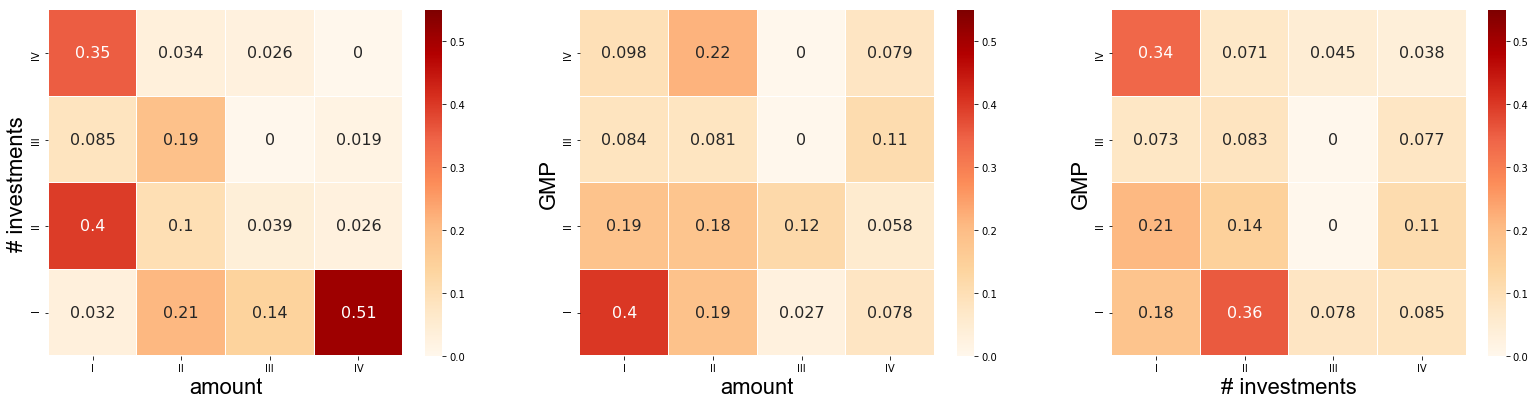

In [13]:
###在热图上画出来来先惯性矩阵
fig=plt.figure(figsize=(27,14))
# f,ax1 = plt.subplot(231)
# f,ax1 = plt.subplots(figsize = (8,6))
ax1 = fig.add_subplot(231)
cmap = plt.cm.get_cmap('OrRd')

sns.heatmap(cMT0, linewidths = 0.05, ax = ax1, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax1.set_xlabel('amount',font2)
ax1.set_ylabel('# investments',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAT.png')#保存图片

### amount & GDP
cMG0 = pd.DataFrame(columns=['I','II','III','IV'] )
cMG0.loc['IV']=cMG.iloc[3:,:].values[0]
cMG0.loc['III']=cMG.iloc[2:3,:].values[0]
cMG0.loc['II']=cMG.iloc[1:2,:].values[0]
cMG0.loc['I']=cMG.iloc[0:1,:].values[0]
###在热图上画出来来先惯性矩阵
ax2=fig.add_subplot(232)
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cMG0, linewidths = 0.05, ax = ax2, vmax=0.55, vmin=0, cmap=cmap ,xticklabels=True, yticklabels=True,annot=True,annot_kws={'size':16,'weight':'normal'})
ax2.set_xlabel('amount',font2)
ax2.set_ylabel('GMP',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAG.png')#保存图片

### times & GDP
cTG0 = pd.DataFrame(columns=['I','II','III','IV'] )
cTG0.loc['IV']=cTG.iloc[3:,:].values[0]
cTG0.loc['III']=cTG.iloc[2:3,:].values[0]
cTG0.loc['II']=cTG.iloc[1:2,:].values[0]
cTG0.loc['I']=cTG.iloc[0:1,:].values[0]

###在热图上画出来来先惯性矩阵
ax3=fig.add_subplot(233)
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cTG0, linewidths = 0.05, ax = ax3, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax3.set_xlabel('# investments',font2)
ax3.set_ylabel('GMP',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardTG.png')#保存图片
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig7_ajagard4.pdf', bbox_inches='tight')

In [14]:
####### 分为三类的时候 ####

In [33]:
cMT2 = pd.DataFrame(getCIJ(City1,City22))###得到相关性矩阵4*4
# cMG = pd.DataFrame(getCIJ(City1,City3))
cTG2 = pd.DataFrame(getCIJ(City22,City3))
#####调整y轴的位置，将行逆置#########
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
### amount & times
cMT02 = pd.DataFrame(columns=['I','II','III'] )
cMT02.loc['IV']=cMT2.iloc[3:,:].values[0]
cMT02.loc['III']=cMT2.iloc[2:3,:].values[0]
cMT02.loc['II']=cMT2.iloc[1:2,:].values[0]
cMT02.loc['I']=cMT2.iloc[0:1,:].values[0]

In [34]:
cMT02

,I,II,III
IV,0.353846,0.033898,0.012987
III,0.084507,0.190476,0.015152
II,0.397260,0.102941,0.045455
I,0.031746,0.211765,0.621622


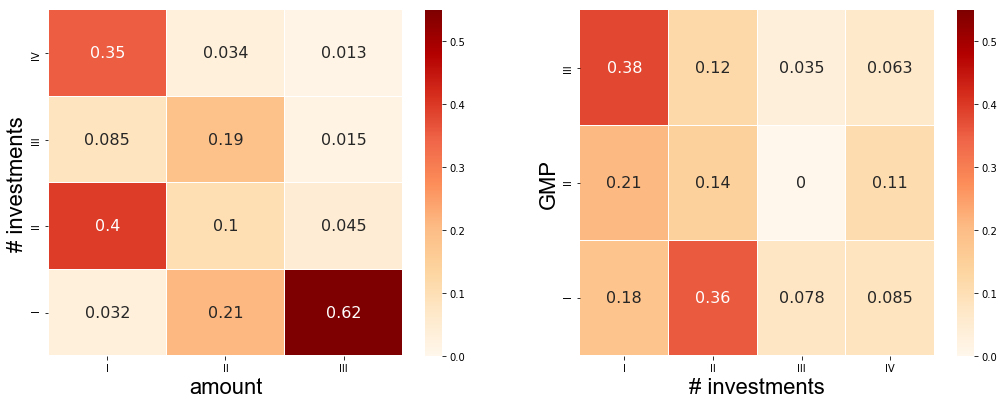

In [37]:
###在热图上画出来来先惯性矩阵
fig=plt.figure(figsize=(27,14))
# f,ax1 = plt.subplot(231)
# f,ax1 = plt.subplots(figsize = (8,6))
ax1 = fig.add_subplot(231)
cmap = plt.cm.get_cmap('OrRd')

###amount& times
sns.heatmap(cMT02, linewidths = 0.05, ax = ax1, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax1.set_xlabel('amount',font2)
ax1.set_ylabel('# investments',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAT.png')#保存图片

### times & GDP
cTG02 = pd.DataFrame(columns=['I','II','III','IV'] )
# cTG02.loc['IV']=cTG2.iloc[3:,:].values[0]
cTG02.loc['III']=cTG2.iloc[2:3,:].values[0]
cTG02.loc['II']=cTG2.iloc[1:2,:].values[0]
cTG02.loc['I']=cTG2.iloc[0:1,:].values[0]

###在热图上画出来来先惯性矩阵
ax3=fig.add_subplot(232)
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cTG02, linewidths = 0.05, ax = ax3, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax3.set_xlabel('# investments',font2)
ax3.set_ylabel('GMP',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardTG.png')#保存图片
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig7_bjagard3.pdf', bbox_inches='tight')

In [38]:
########## 分为3类的时候的 jacard 

In [42]:
city13 = get_city(dataClass,'clusterA3') ###得到投资金额不同类的城市
city23 = get_city(dataClass,'clusterT3') ###得到投资金额不同类的城市
city33 = get_city(dataClass,'clusterG3') ###得到投资金额不同类的城市

City13 = [list(c) for c in city13]
City23 = [list(c) for c in city23]
City33 = [list(c) for c in city33]

cMT3 = pd.DataFrame(getCIJ(City13,City23))###得到相关性矩阵4*4
cMG3 = pd.DataFrame(getCIJ(City13,City33))
cTG3 = pd.DataFrame(getCIJ(City23,City33))
#####调整y轴的位置，将行逆置#########
font2 = {'family' : 'Arial',
    'weight' : 'normal',
    'size' : 22,
    }###设置横纵坐标的字体格式
### amount & times
cMT03 = pd.DataFrame(columns=['I','II','III'] )
cMT03.loc['III']=cMT3.iloc[2:3,:].values[0]
cMT03.loc['II']=cMT3.iloc[1:2,:].values[0]
cMT03.loc['I']=cMT3.iloc[0:1,:].values[0]

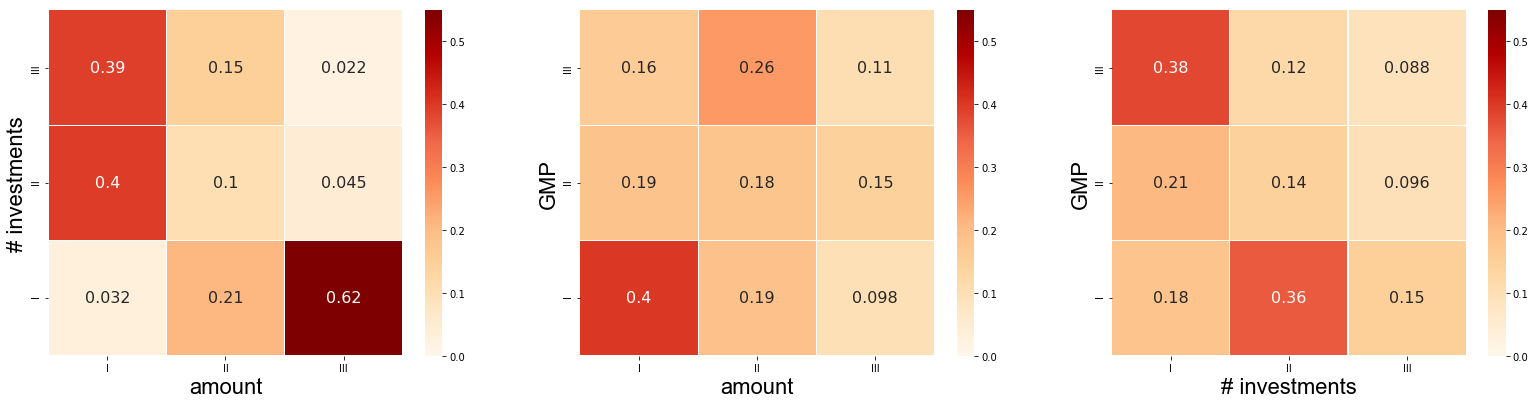

In [44]:
###在热图上画出来来先惯性矩阵
fig=plt.figure(figsize=(27,14))
# f,ax1 = plt.subplot(231)
# f,ax1 = plt.subplots(figsize = (8,6))
ax1 = fig.add_subplot(231)
cmap = plt.cm.get_cmap('OrRd')

sns.heatmap(cMT03, linewidths = 0.05, ax = ax1, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax1.set_xlabel('amount',font2)
ax1.set_ylabel('# investments',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAT.png')#保存图片

### amount & GDP
cMG03 = pd.DataFrame(columns=['I','II','III'] )
cMG03.loc['III']=cMG3.iloc[2:3,:].values[0]
cMG03.loc['II']=cMG3.iloc[1:2,:].values[0]
cMG03.loc['I']=cMG3.iloc[0:1,:].values[0]
###在热图上画出来来先惯性矩阵
ax2=fig.add_subplot(232)
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cMG03, linewidths = 0.05, ax = ax2, vmax=0.55, vmin=0, cmap=cmap ,xticklabels=True, yticklabels=True,annot=True,annot_kws={'size':16,'weight':'normal'})
ax2.set_xlabel('amount',font2)
ax2.set_ylabel('GMP',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardAG.png')#保存图片

### times & GDP
cTG03 = pd.DataFrame(columns=['I','II','III'] )
cTG03.loc['III']=cTG3.iloc[2:3,:].values[0]
cTG03.loc['II']=cTG3.iloc[1:2,:].values[0]
cTG03.loc['I']=cTG3.iloc[0:1,:].values[0]

###在热图上画出来来先惯性矩阵
ax3=fig.add_subplot(233)
cmap = plt.cm.get_cmap('OrRd')
sns.heatmap(cTG03, linewidths = 0.05, ax = ax3, vmax=0.55, vmin=0, cmap=cmap,annot=True,annot_kws={'size':16,'weight':'normal'})
ax3.set_xlabel('# investments',font2)
ax3.set_ylabel('GMP',font2)
# plt.savefig('C:\\Users\\lu\\Desktop\\标度律\\6_jagardTG.png')#保存图片
plt.savefig('E:/文档系列/python 系列/picScalling/20201025NEW/Fig7_ajagard3.pdf', bbox_inches='tight')